## This notebook plots the allocations of the portfolios in each pareto front

In [73]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [74]:
df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [75]:
asset_classes = df.columns

In [76]:
def load_pareto_fronts(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    all_runs = []
    for entry in data:
        pareto_front = []
        for solution in entry.get("solutions", []):
            # Ensure solution is a dictionary
            if isinstance(solution, dict):
                pareto_front.append({
                    "weights": solution.get("weights", []),
                    "expected_return": solution.get("expected_return", 0),
                    "SCR_risk": solution.get("SCR_risk", 0),
                    "risk_measure": solution.get("risk_measure", ""),
                    "distribution": solution.get("distribution", ""),
                    "period": solution.get("period", [])
                })
        all_runs.append(pareto_front)
    return all_runs

json_file_path = "../pareto_front_results.json"
pareto_fronts = load_pareto_fronts(json_file_path)

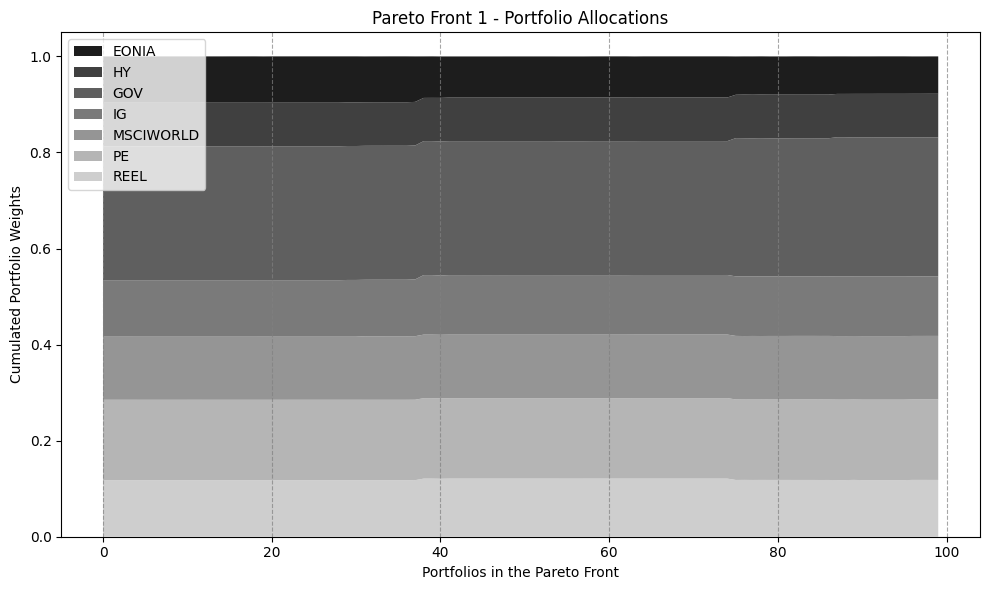

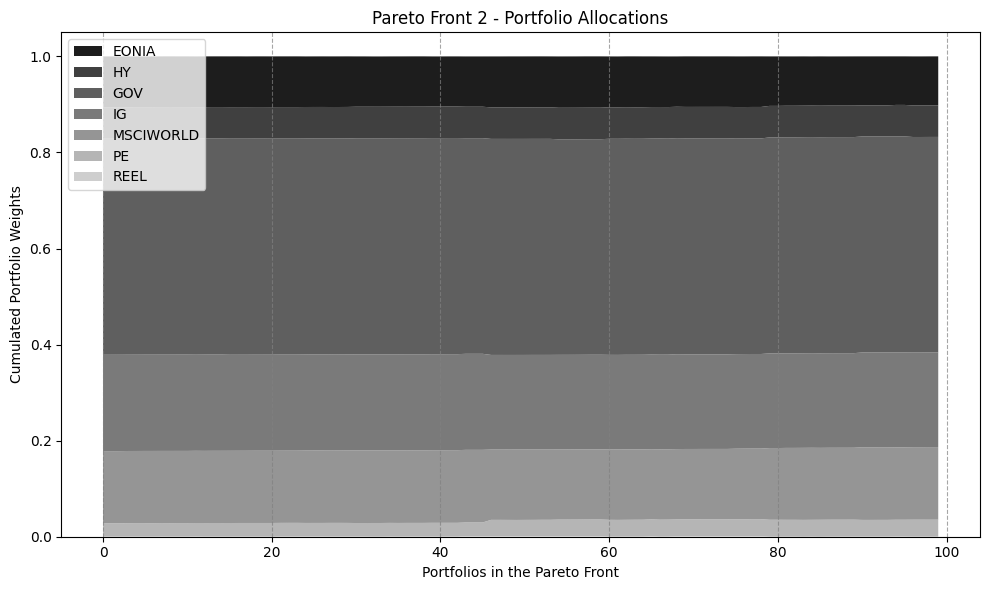

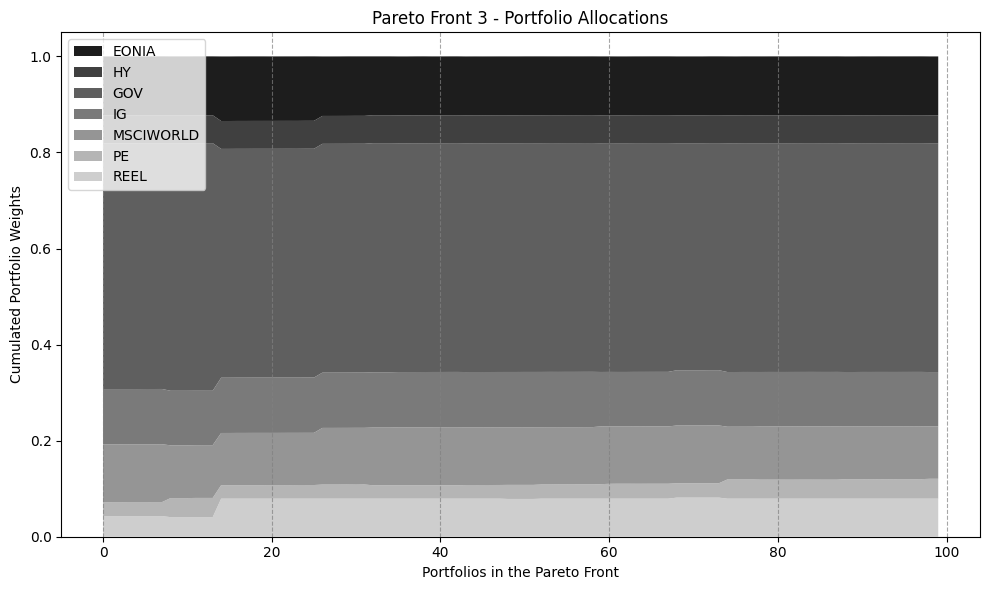

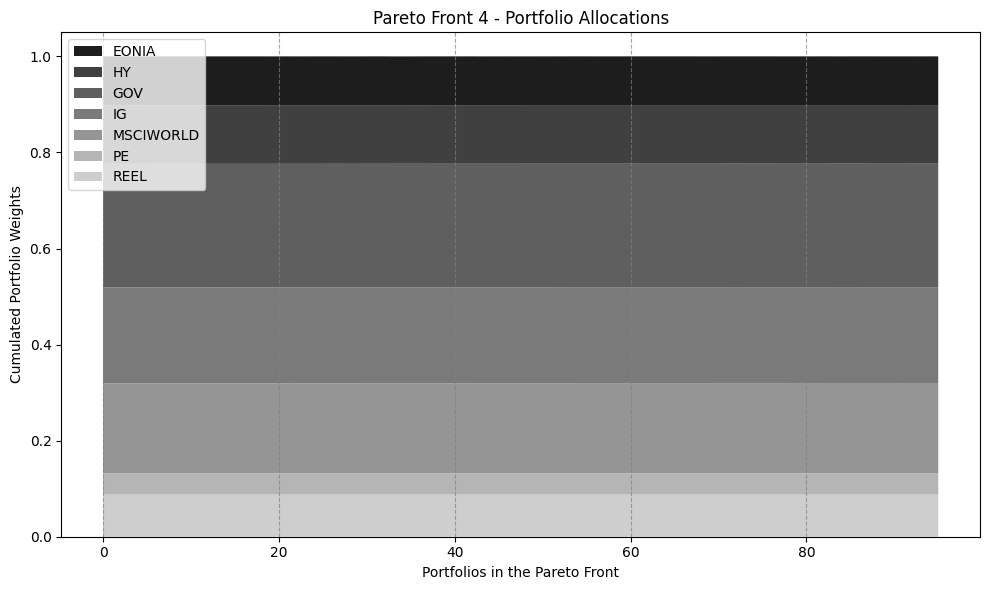

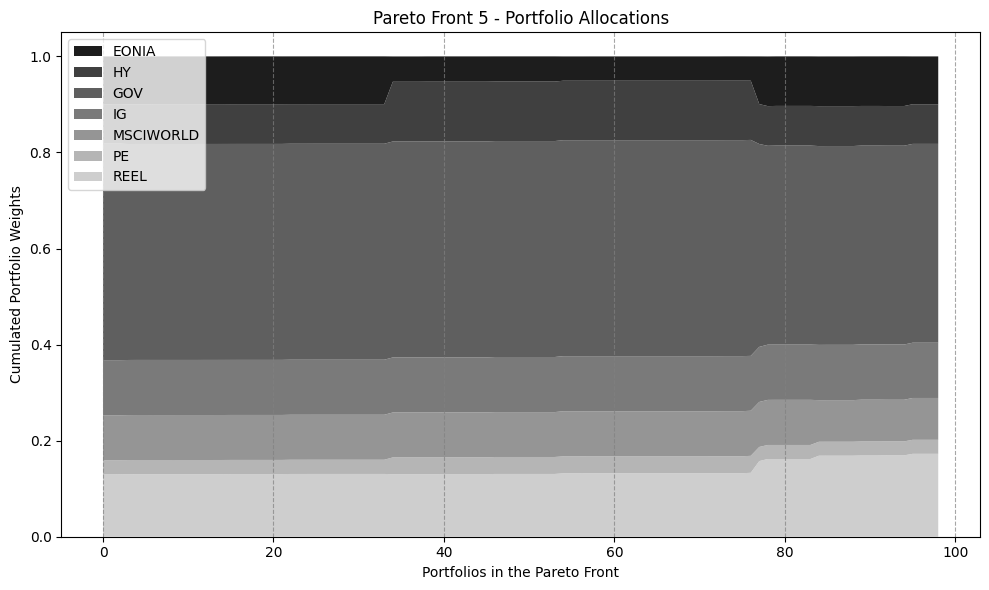

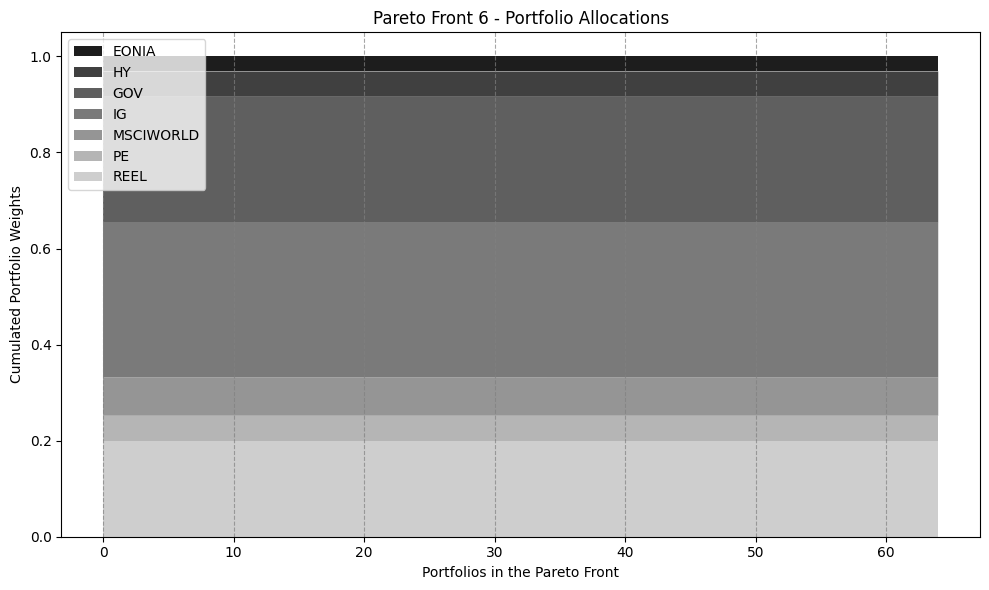

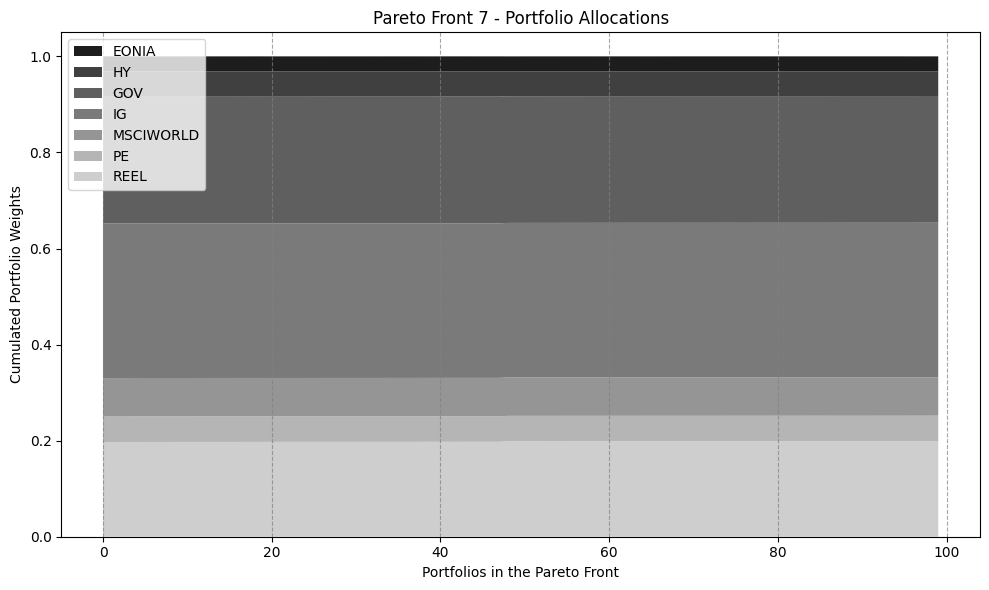

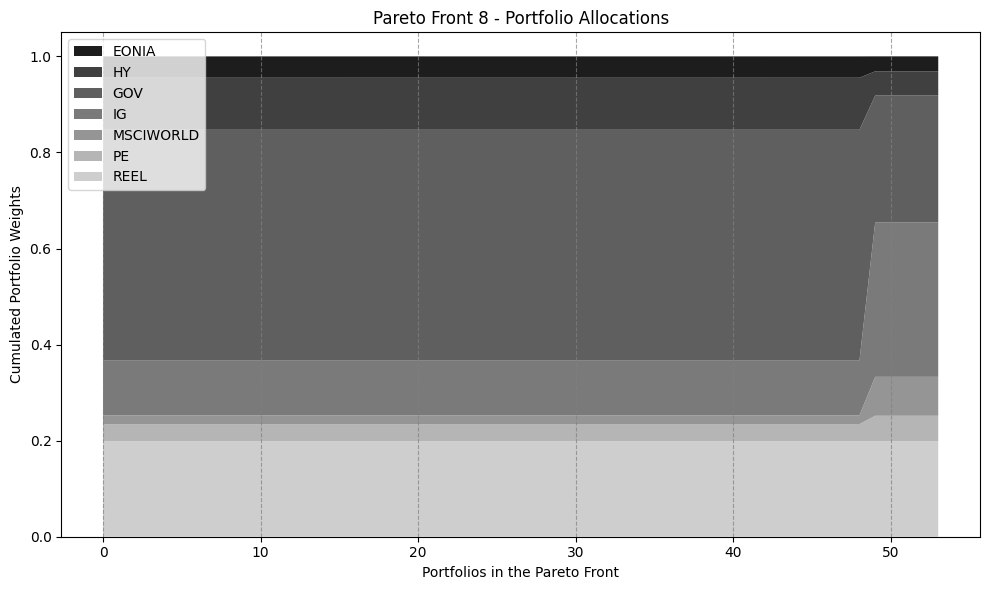

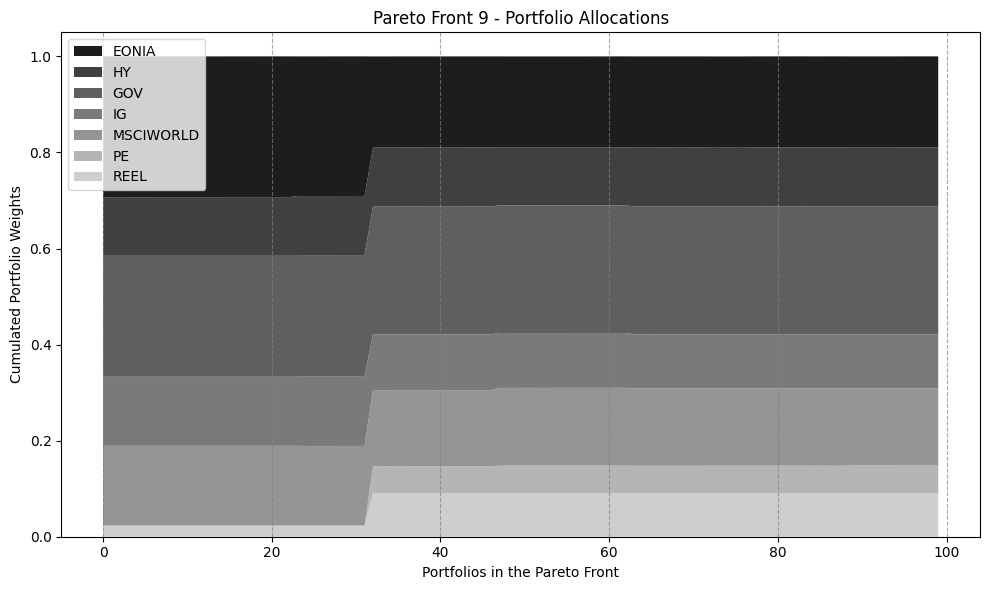

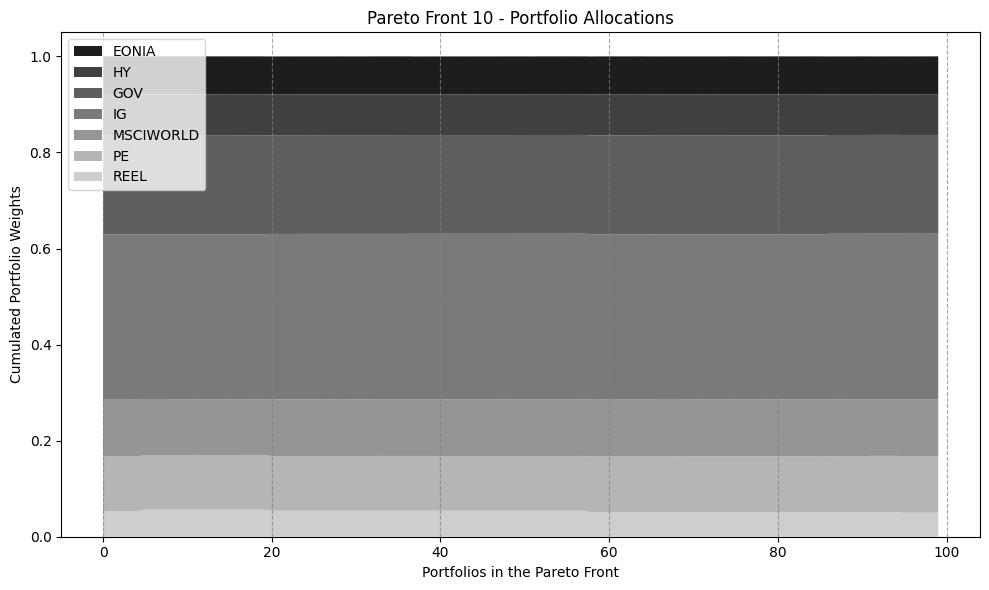

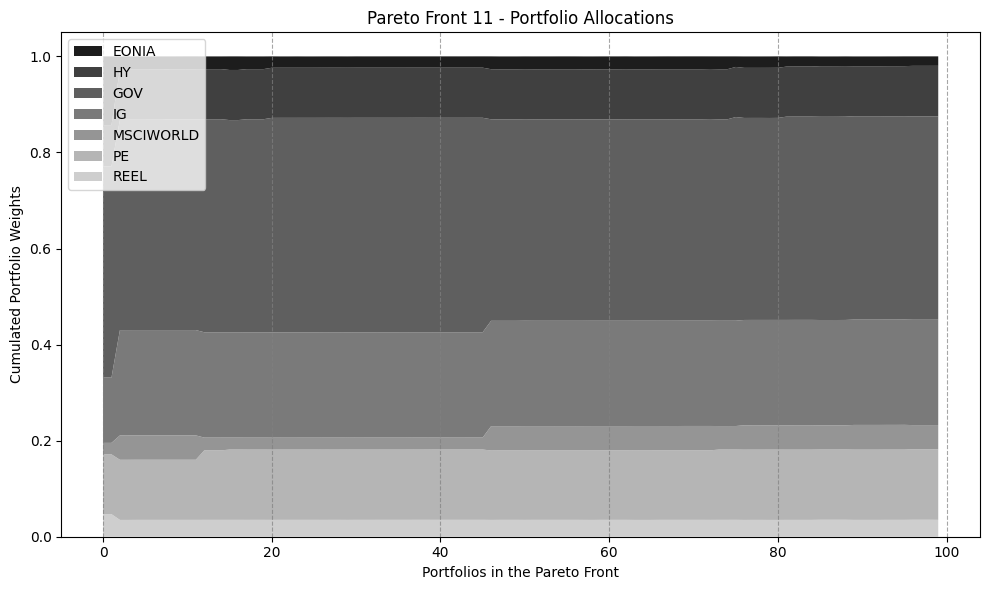

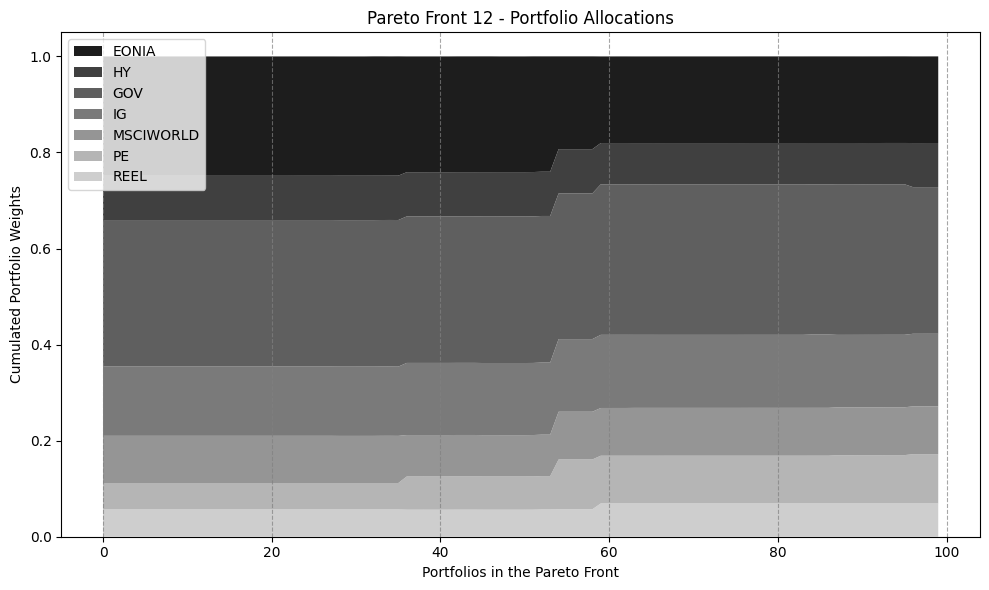

In [77]:
for i, pareto_front in enumerate(pareto_fronts):
    # Sort the Pareto front by SCR_risk in ascending order
    sorted_pareto_front = sorted(pareto_front, key=lambda x: x["SCR_risk"])
    
    # Extract weights for the sorted Pareto front
    all_weights = [solution["weights"] for solution in sorted_pareto_front]
    portfolio_numbers = range(len(all_weights))  # Portfolio numbers for the x-axis

    # Create a DataFrame for the current Pareto front
    df_weights = pd.DataFrame(all_weights, columns=asset_classes, index=portfolio_numbers)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.stackplot(df_weights.index, df_weights.T, labels=asset_classes, colors=plt.cm.Greys(np.linspace(0.3, 0.9, len(asset_classes))))

    # Customize the plot
    plt.xlabel("Portfolios in the Pareto Front")
    plt.ylabel("Cumulated Portfolio Weights")
    plt.title(f"Pareto Front {i+1} - Portfolio Allocations")
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(reversed(handles), reversed(labels), loc='upper left', fontsize=10, frameon=True)            
    plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

    # Save or display the plot
    plt.tight_layout()
    plt.show()